In [182]:
import yfinance as yf

In [183]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-5, end.month, end.day)

In [214]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GOOG']: InvalidURL(LocationParseError('Failed to parse: https://your_proxy:port'))


In [212]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [186]:
google_data.shape

(0, 6)

In [187]:
google_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  0 non-null      float64
 1   (Close, AAPL)      0 non-null      float64
 2   (High, AAPL)       0 non-null      float64
 3   (Low, AAPL)        0 non-null      float64
 4   (Open, AAPL)       0 non-null      float64
 5   (Volume, AAPL)     0 non-null      float64
dtypes: float64(6)
memory usage: 0.0 bytes


In [189]:
google_data.isna().sum()

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

In [190]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

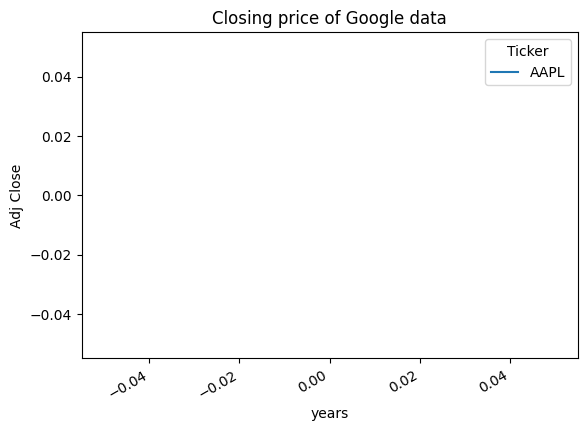

In [191]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [192]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [193]:
google_data.columns

MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

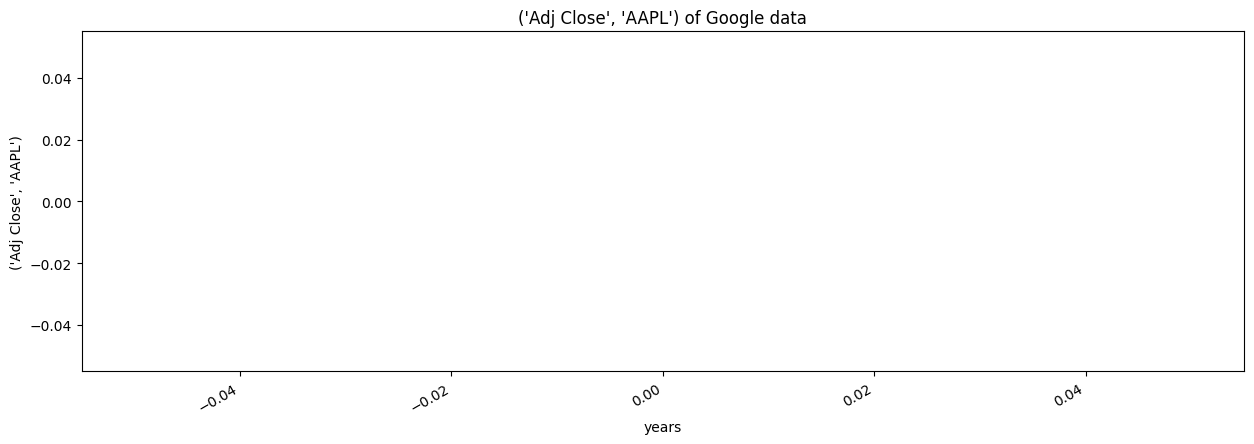

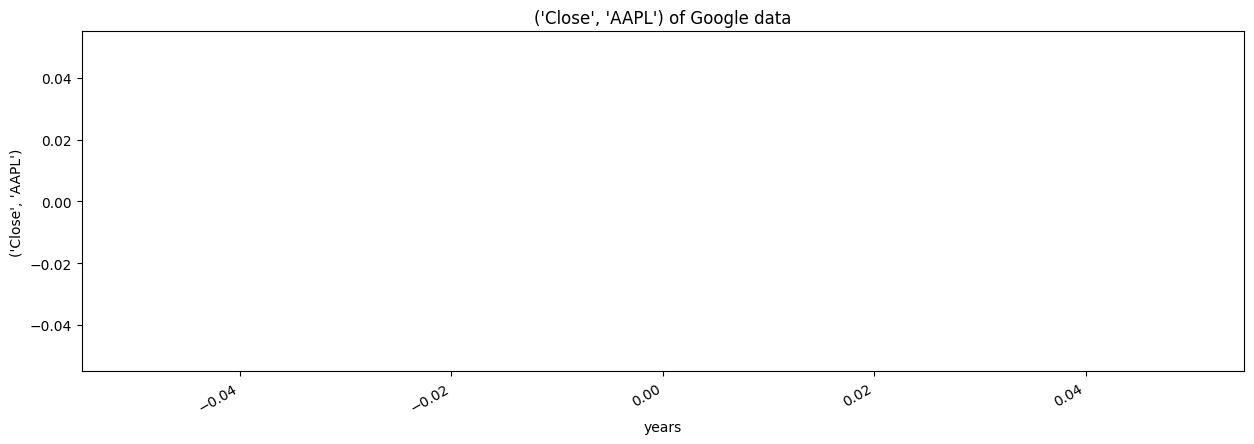

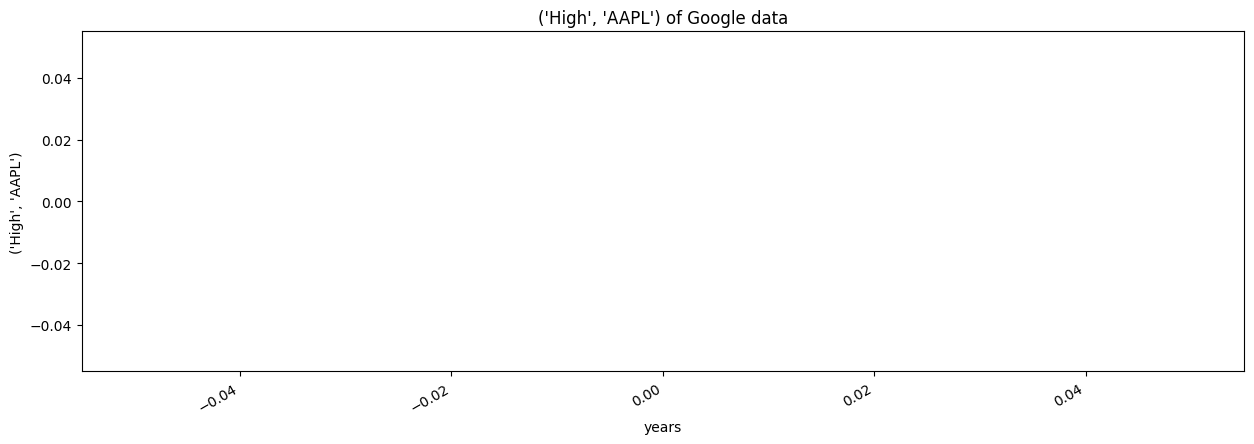

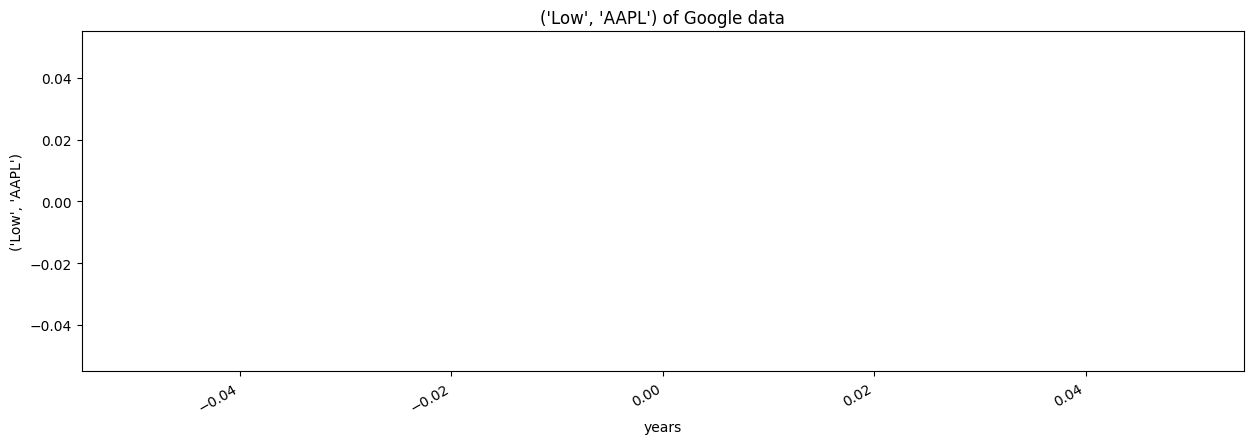

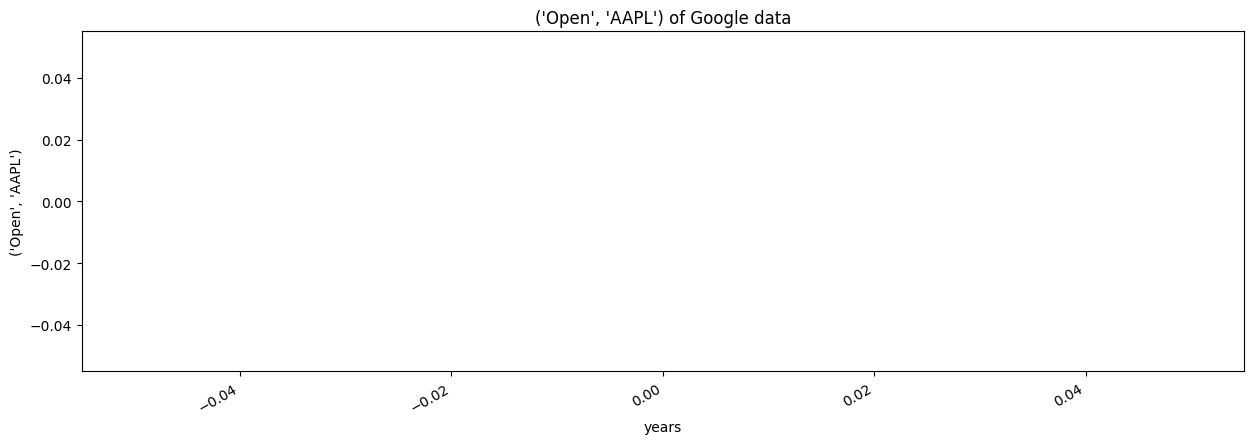

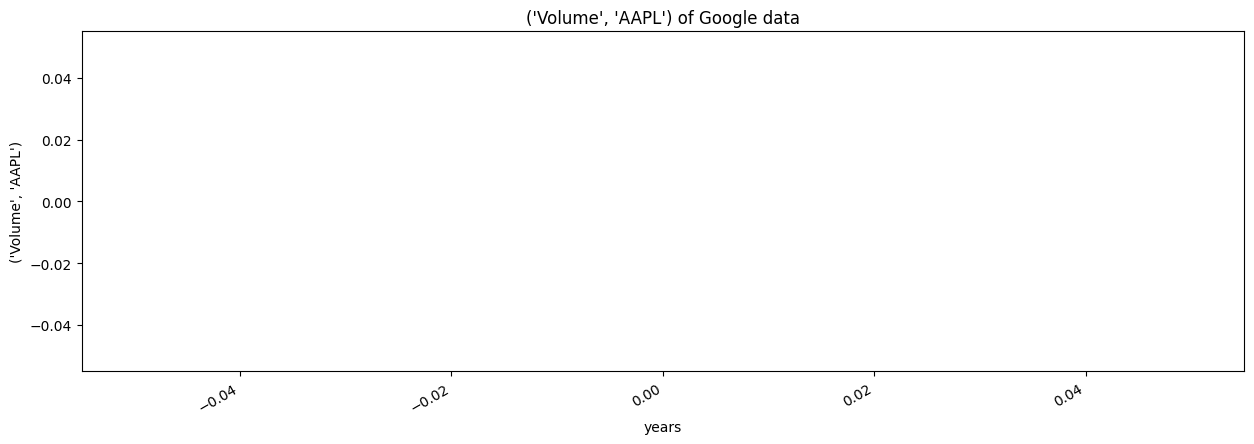

In [194]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [195]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [196]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [197]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [198]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [199]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 0
2006 0
2007 0
2008 0
2009 0
2010 0
2011 0
2012 0
2013 0
2014 0
2015 0
2016 0
2017 0
2018 0
2019 0
2020 0
2021 0
2022 0
2023 0
2024 0


In [200]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [201]:
google_data['MA_for_250_days'][0:250].tail()

Series([], Name: MA_for_250_days, dtype: float64)

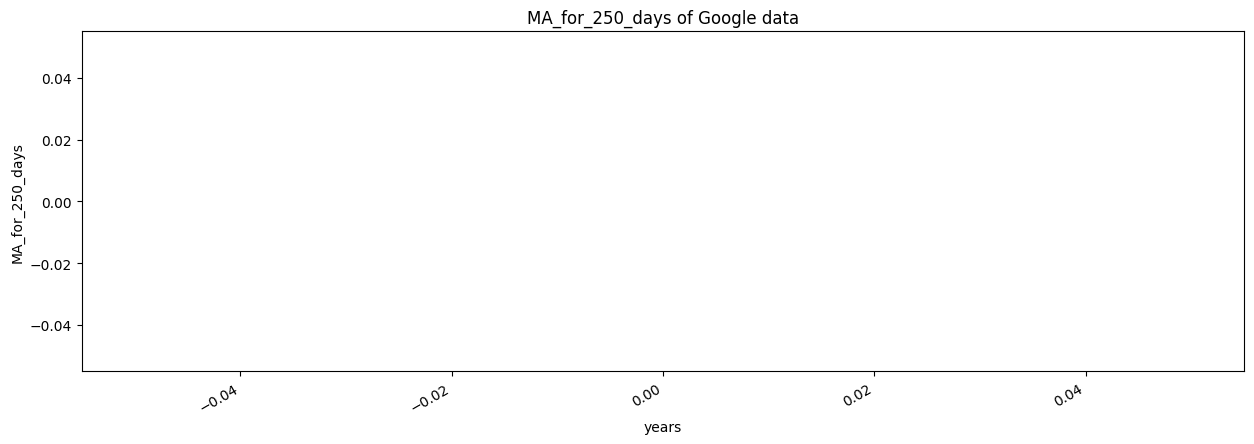

In [202]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

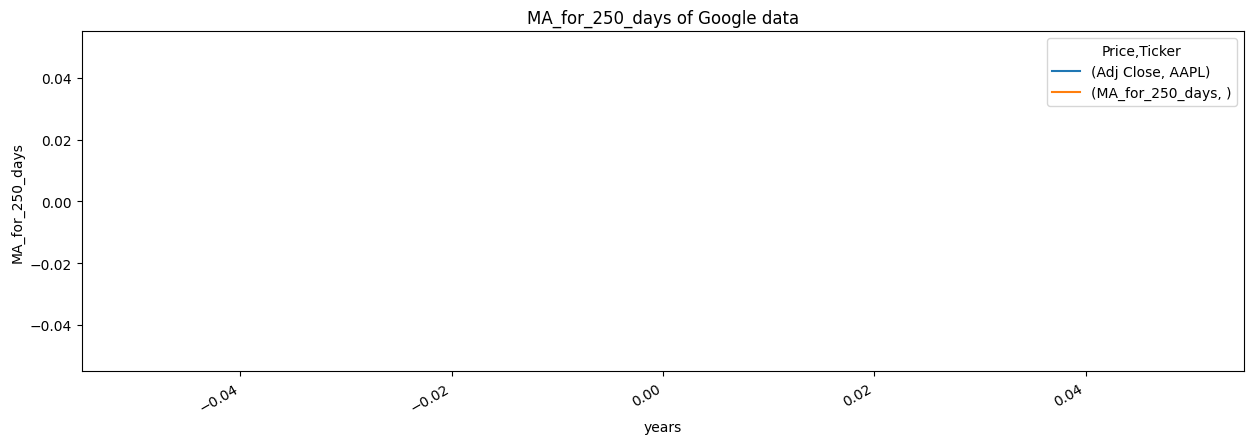

In [203]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

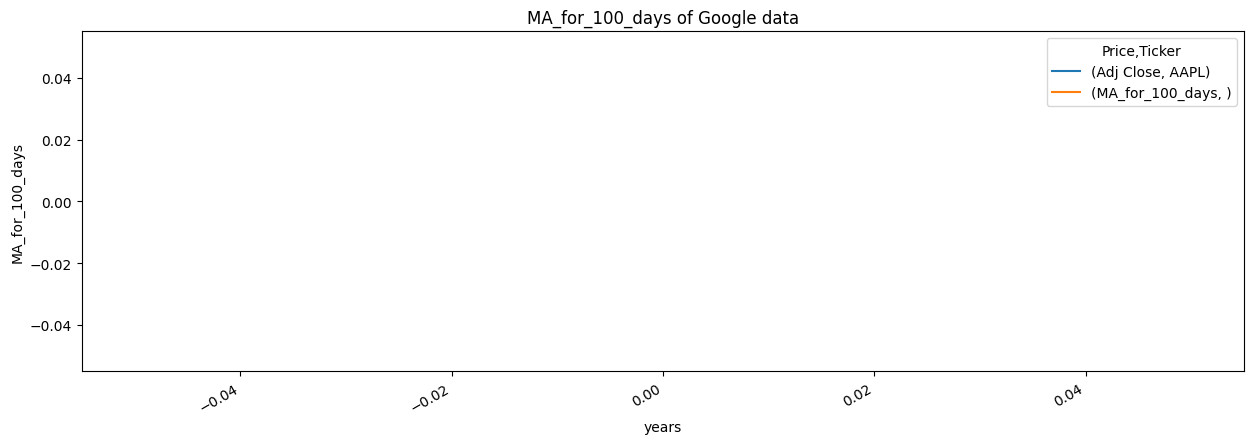

In [204]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

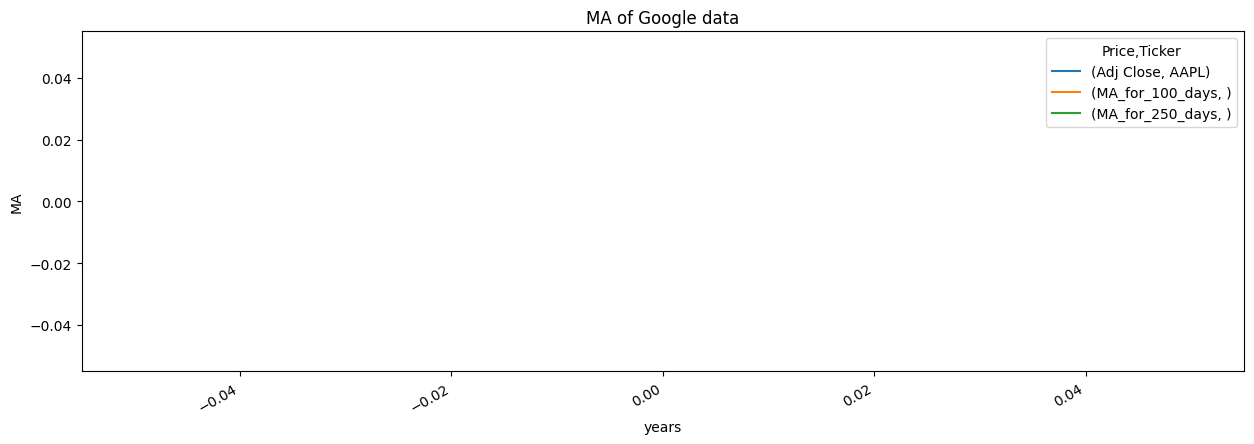

In [205]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [206]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

Price,Adj Close,percentage_change_cp
Ticker,AAPL,
Date,,


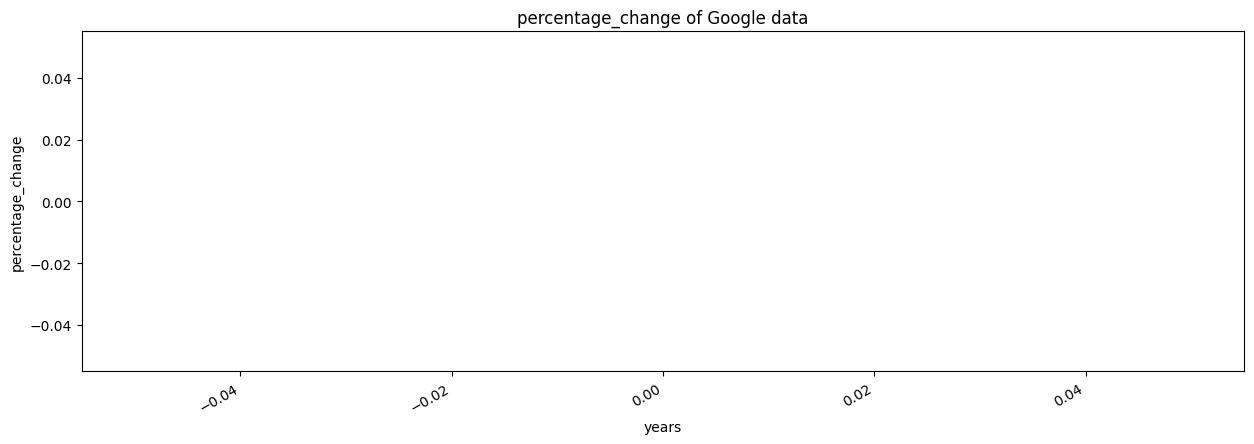

In [207]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [208]:
Adj_close_price = google_data[['Adj Close']]

In [209]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [ ]:
len(scaled_data)

5034

In [ ]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [ ]:
x_data[0],y_data[0]

(array([[8.33099102e-04],
        [1.91443377e-04],
        [0.00000000e+00],
        [4.55500587e-04],
        [2.20489417e-04],
        [6.20525574e-05],
        [1.14997282e-03],
        [1.29388033e-03],
        [8.56867038e-04],
        [1.33348764e-03],
        [1.98571224e-03],
        [1.81803933e-03],
        [2.15471291e-03],
        [2.36595361e-03],
        [2.89539072e-03],
        [3.00761947e-03],
        [3.02610170e-03],
        [3.64663741e-03],
        [3.01157995e-03],
        [4.32130472e-03],
        [3.23734494e-03],
        [3.10663902e-03],
        [2.45177664e-03],
        [3.15152951e-03],
        [3.31128399e-03],
        [3.11059950e-03],
        [3.35353163e-03],
        [3.34693083e-03],
        [3.95954812e-03],
        [4.47841889e-03],
        [3.60702756e-03],
        [3.16076809e-03],
        [2.41612980e-03],
        [1.41799051e-03],
        [9.42687532e-04],
        [2.54287523e-03],
        [2.38972408e-03],
        [2.68810797e-03],
        [3.3

In [ ]:

int(len(x_data)*0.7)

3453

In [ ]:
4908-100-int(len(x_data)*0.7)

1355

In [ ]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1481, 100, 1)
(1481, 1)


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\projects\stock_price_prediction-main\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 168s 47ms/step - loss: 3.9548e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 197s 57ms/step - loss: 6.2311e-05


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step


In [ ]:
predictions

array([[0.26243082],
       [0.26504585],
       [0.26749685],
       ...,
       [0.8689478 ],
       [0.8749017 ],
       [0.8783754 ]], dtype=float32)

In [ ]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 53.608402],
       [ 54.100506],
       [ 54.561745],
       ...,
       [167.74486 ],
       [168.8653  ],
       [169.51898 ]], dtype=float32)

In [ ]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 54.36149597],
       [ 54.7784729 ],
       [ 53.39487457],
       ...,
       [172.97999573],
       [173.02000427],
       [176.08999634]])

In [ ]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [ ]:
rmse

np.float64(2.809898547874282)

In [ ]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-01-17,54.361496,53.608402
2019-01-18,54.778473,54.100506
2019-01-22,53.394875,54.561745
2019-01-23,53.646755,54.253876
2019-01-24,53.563457,54.018322


<Figure size 640x480 with 0 Axes>

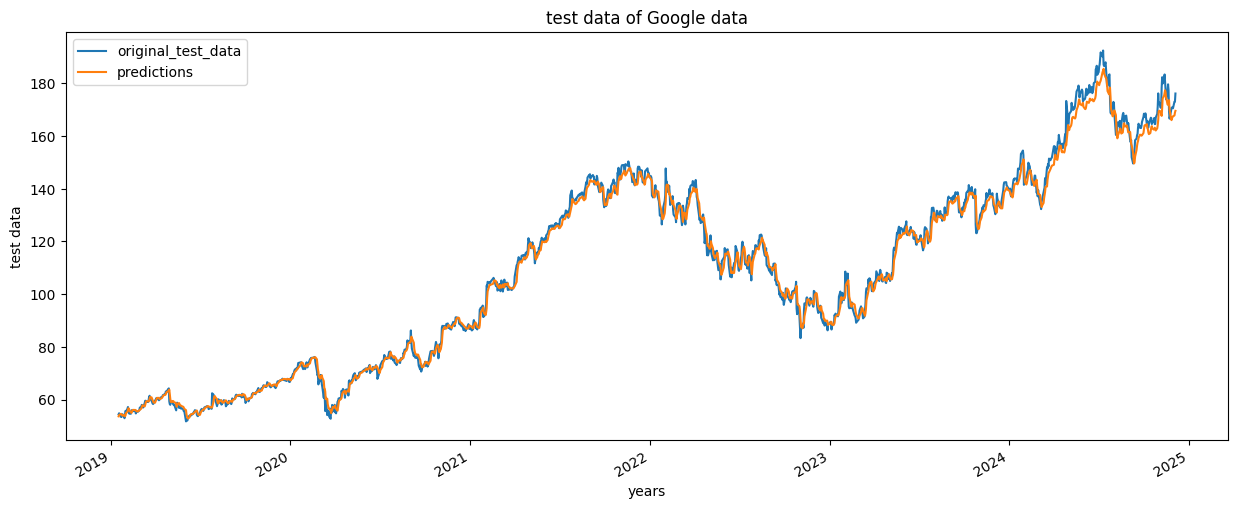

In [ ]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

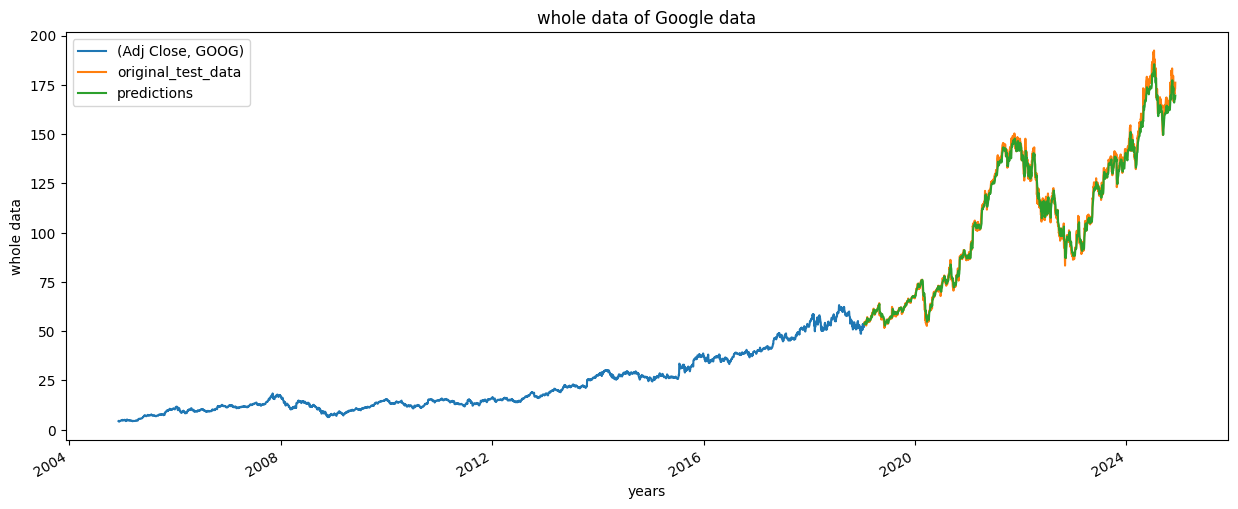

In [ ]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [ ]:
model.save("Latest_stock_price_model.keras")